## Question 3

Task: finding locations to clean while avoiding high traffic areas

Environment: screenshot here

Action space: {rotate CW, rotate CCW, move forward} 

    - if the robot is currently facing up, and it wants to do a 180 turn, 
    - it'll need to 1) rotate CW, 2) rotate CW, 3) move foward


Reward function: 

    * +10 for reaching cleaning locations
    * -10 for entering high traffic areas
    * -1 for any action

**Folder setup**
```
Question3
- question3.ipynb
- clean_airport_env.py
- generalized_policy_iteration.py
- plotting.py
- robot_enums.py
- simple_grid_env.py
```

In [1]:
# Import the functions provided to us
import numpy as np
from simple_grid_env import SimpleGridEnv
from clean_airport_env import CleanAirportEnv
from robot_enums import Heading
from robot_enums import Action
from plotting import ValueFunctionPlotter
from plotting import PolicyPlotter

<Figure size 720x720 with 0 Axes>

In [2]:
forward_mapper  = {0: (1, 0),
                   1: (0, 1),
                   2: (-1, 0),
                   3: (0, -1)}

**General Policy Iteration Class**

In [3]:
class GeneralPolicyIteration(object):
    """
    @info: Class constructor.
    @param: Environment (clean airport or simple grid).
    """

    def __init__(self, environment, discount_factor):
        self.env = environment
        self.discount_factor = discount_factor

    """
    @info: Evaluate the given policy.
    @param: policy: state to action mapping.
            theta: Stopping condition.
            max_iteration: Maximum number of iterations before automatically returned.
    @return: V: state-value function.
    """

    def get_state_value(self, i, j, k, policy, iteration):
        '''
        gets the value for the current state 
        
        Args:
        i: row
        j: col
        k: direction the robot is facing

        '''
        max_iterations = 1000

        if (i, j) in win_states:
            return 10
        elif (i, j) in lose_states:
            return -10
        
        action = policy[i][j][k]
        ii, jj, kk = i, j, k
        if action == 0: # Forward
            ii, jj = forward_mapper[k][0] + i, forward_mapper[k][1] + j
        elif action == 1: # CW
            kk = (k+1) % 4
        elif action == 2: # CCW
            kk = (k-1) % 4

        ii = max(ii, 0)
        ii = min(ii, 2)
        jj = max(jj, 0)
        jj = min(jj, 3)

        if iteration >= max_iterations:
            return 0

        return self.get_state_value(ii, jj, kk, policy, iteration+1) - 1

    def policy_evaluation(self, policy, theta=1e-9, max_iterations=1e3):
        # Initialise value function for each state as zero, V(terminal) = 0, others can be arbitrary
        V = np.zeros([self.env.grid_rows, self.env.grid_cols, 4])

        for k in range(4):
            for i, row in enumerate(V[:, :, k]):
                for j, s in enumerate(V[i, :, k]):
                    # print(V_north[i][j])
                    V[i, j, k] = self.get_state_value(i, j, k, policy, 0)
        
        return V

    """
    @info:  Improve the given policy.
    @param: policy: state to action mapping.
            V:  State-value function.
    @return: policy: Improved policy.
    """

    def policy_improvement(self, policy, V):

        stable_policy = True

        print("policy_improvement: Insert your implementation here")
        
        return policy, stable_policy

    """
    @info:  Policy iteration (using iterative policy evaluation).
            max_iteration: Maximum number of iterations before automatically returned.
    @return: policy: State to action mapping.
             V: State-value function.
    """

    def policy_iteration(self, max_iterations=1e3):
        # Initialize a random policy
        policy = np.random.randint(0, self.env.nA, size=(self.env.grid_rows, self.env.grid_cols, len(Heading)))
        V = np.zeros([self.env.grid_rows, self.env.grid_cols, len(Heading)])

        # Create functions for plotting
        value_function_plotter = ValueFunctionPlotter()
        # value_function_plotter.plot(V)
        policy_plotter = PolicyPlotter()
        policy_plotter.plot(policy)

        for i in range(int(max_iterations)):
            V = self.policy_evaluation(policy)
            value_function_plotter.plot(V)
            break
            

        return policy, V

    """
    @info:  Value iteration
            theta: Stopping condition.
            max_iteration: Maximum number of iterations before automatically returned.
    @return: policy: State to action mapping.
             V: State-value function.
    """

    def value_iteration(self, theta=1e-9, max_iterations=1e3):
        # Initialize a random policy
        policy = np.random.randint(0, self.env.nA, size=(self.env.grid_rows, self.env.grid_cols, len(Heading)))
        V = np.zeros([self.env.grid_rows, self.env.grid_cols, len(Heading)])

        # Create functions for plotting
        value_function_plotter = ValueFunctionPlotter()
        policy_plotter = PolicyPlotter()

        value_function_plotter.plot(V)
        policy_plotter.plot(policy)

        print("value_iteration: Insert your implementation here")

        return policy, V


Visualizing results

[4, 3, 4]
4
[4, 3, 4]
4


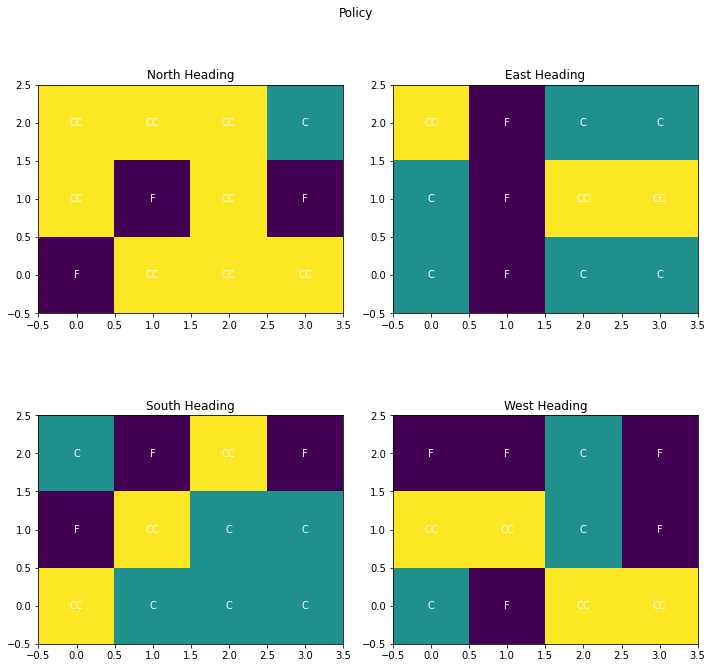

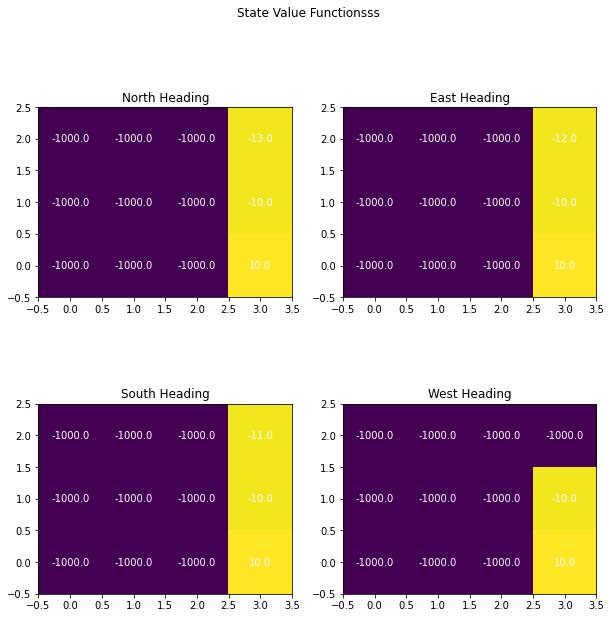

In [4]:
# Simple Grid Env
grid_rows = 3
grid_cols = 4
start_state = (0, 0, Heading.NORTH)

# Simple example
win_states = [(0, 3)]
lose_states = [(1, 3)]

# Simple gridworld
robot = SimpleGridEnv(grid_rows, grid_cols, start_state, win_states, lose_states)

# Run the requested algorithms
gpi = GeneralPolicyIteration(robot, discount_factor=1.0)

policy, value = gpi.policy_iteration()

In [5]:
policy[:, :, 1]

array([[1, 0, 1, 1],
       [1, 0, 2, 2],
       [2, 0, 1, 1]])

In [6]:
policy[2, 1, 1]

0